<a href="https://colab.research.google.com/github/NetraMoger/Weather_Clustering-KMeans/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
#https://www.kaggle.com/prakharrathi25/weather-data-clustering-using-k-means

import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
import os
os.getcwd()

'/content'

In [4]:
%cd

/root


In [5]:
os.getcwd()

'/root'

In [17]:
df = pd.read_csv('/root/minute_weather.csv')

In [18]:
df

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,10-09-2011 00:00,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,10-09-2011 00:01,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,10-09-2011 00:02,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,10-09-2011 00:03,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,10-09-2011 00:04,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,16-08-2013 04:48,916.6,78.62,195.0,1.0,196.0,1.1,194.0,0.9,0.0,0.0,9.1
1048571,1048571,16-08-2013 04:49,916.6,78.62,192.0,0.9,193.0,0.9,192.0,0.8,0.0,0.0,8.8
1048572,1048572,16-08-2013 04:50,916.6,78.62,186.0,0.7,186.0,0.8,186.0,0.6,0.0,0.0,8.6
1048573,1048573,16-08-2013 04:51,916.6,78.62,176.0,0.6,178.0,0.7,175.0,0.5,0.0,0.0,7.1


In [19]:
df.shape

(1048575, 13)

**allmeaning of the columns** 
### hpwren_timestamp -  date time stamp for every minute data
### air_pressure - pressure within the atmosphere of the earth , formaul is there
### air temporature - temperature in atmosphere, its measure how what and cold air is
### avg_wind_direction - ,  
1. finding wind flow from west to east , rather than north-south 
2. wtvr earth's rotation generates is called as coriolis effect
3. This effect makes twister
4. clock wise in northen hemisphere
5. clockwise in southern hemishpere

### avg_wind_speed - In the U.S., daily wind speeds typically average between 6 and 12 miles per hour (10 and 19 kilometers per hour) throughout the course of a year

### rain accumulation - how much rain accumalted on earth.. 1cm or anything

### rain duration - how long it rained





In [21]:
df.head()



,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,10-09-2011 00:00,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,10-09-2011 00:01,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,10-09-2011 00:02,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,10-09-2011 00:03,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,10-09-2011 00:04,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [22]:
maindf = df[df['rowID']%10==0]

In [26]:
maindf.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_accumulation', 'rain_duration', 'relative_humidity'],
      dtype='object')

In [28]:
maindf[maindf['rain_accumulation']==0].shape

(104152, 13)

In [29]:
maindf[maindf['rain_duration']==0].shape

(103726, 13)

In [31]:
del maindf['rain_duration']


In [33]:
del maindf['rain_accumulation']


In [34]:
maindf.shape

(104858, 11)

In [35]:
bf = maindf.shape[0]

In [72]:
maindf.dropna(inplace=True)
af = maindf.shape[0]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
bf-af

26

In [74]:
maindf

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,0,10-09-2011 00:00,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
10,10,10-09-2011 00:10,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,38.5
20,20,10-09-2011 00:20,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,58.3
30,30,10-09-2011 00:30,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,57.9
40,40,10-09-2011 00:40,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,57.4
...,...,...,...,...,...,...,...,...,...,...,...
1048530,1048530,16-08-2013 04:08,916.7,78.62,195.0,0.9,197.0,1.0,193.0,0.8,9.0
1048540,1048540,16-08-2013 04:18,916.7,78.62,189.0,1.0,190.0,1.1,188.0,0.9,8.0
1048550,1048550,16-08-2013 04:28,916.7,78.80,187.0,0.6,189.0,0.6,186.0,0.5,8.5
1048560,1048560,16-08-2013 04:38,916.6,78.80,204.0,1.2,205.0,1.3,203.0,1.1,7.2


In [75]:
features=['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_speed', 'relative_humidity']

In [76]:
select_df = maindf[features]

In [77]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [79]:
select_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Standard scaler - It helps scale your data which fits into your model
### Fit transform - Combines fit and does transform operation
### It first caluclates how much data to be transformed to be scaled

In [80]:
X = StandardScaler().fit_transform(select_df)

In [81]:
X

array([[-1.48932625,  0.32206717, -0.67621576, -0.76894847, -0.74982427,
         0.44601437],
       [-1.48932625,  0.11256717, -0.18596485, -0.76894847, -0.66511542,
        -0.39916312],
       [-1.52172555,  0.20235289, -0.64492315, -0.37226787, -0.36863444,
         0.36149662],
       ...,
       [-0.06375737,  1.48928149,  0.26256257, -1.06645891, -1.17336853,
        -1.55167787],
       [-0.09615666,  1.48928149,  0.43988737, -0.76894847, -0.87688755,
        -1.60162017],
       [-0.09615666,  1.4743172 ,  0.34600954, -0.86811862, -0.9615964 ,
        -1.52862757]])

### Invoking Kmeans cluster algorithm
### Which help us to create 12 clusters

In [82]:
kmeans = KMeans(n_clusters=12)


In [84]:
model = kmeans.fit(X)
print("Model : \n ", model)

Model : 
  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [86]:
#center points for each feature and for each cluster
centers = model.cluster_centers_
centers

array([[-0.14010102,  0.68014809,  0.36311824,  0.7042554 ,  0.65037715,
        -0.22405881],
       [ 0.91105162,  0.00841397,  0.83022442, -0.61360359, -0.59864954,
        -0.75013176],
       [ 0.30919806, -0.809429  , -1.20630733, -0.59647597, -0.60442666,
         0.77416186],
       [ 0.65083044, -0.97542179,  0.93032086, -0.41457847, -0.38780888,
         1.09468816],
       [-1.18877571, -0.69819361,  0.45971934,  2.06833058,  2.04770055,
         0.72967468],
       [-0.08602593,  1.23852432,  1.0828504 , -0.63340993, -0.60871605,
        -0.7610714 ],
       [ 1.17396663, -0.3726146 , -1.11172589,  2.04148326,  2.13254272,
        -1.16201942],
       [-0.7005131 ,  0.28267137,  0.12676182, -0.55288145, -0.56761405,
         0.07698166],
       [-0.11024637,  0.93035015, -1.26847251, -0.6243885 , -0.6372632 ,
        -0.7212045 ],
       [-0.91628421, -0.99256155,  0.33350002, -0.53974808, -0.53106031,
         1.39312206],
       [ 1.43512884, -0.09721426, -1.12612768, -0.

### Plot a graph to see the distance between each clusters

In [93]:
z

[array([-0.14010102,  0.68014809,  0.36311824,  0.7042554 ,  0.65037715,
        -0.22405881,  0.        ]),
 array([ 0.91105162,  0.00841397,  0.83022442, -0.61360359, -0.59864954,
        -0.75013176,  1.        ]),
 array([ 0.30919806, -0.809429  , -1.20630733, -0.59647597, -0.60442666,
         0.77416186,  2.        ]),
 array([ 0.65083044, -0.97542179,  0.93032086, -0.41457847, -0.38780888,
         1.09468816,  3.        ]),
 array([-1.18877571, -0.69819361,  0.45971934,  2.06833058,  2.04770055,
         0.72967468,  4.        ]),
 array([-0.08602593,  1.23852432,  1.0828504 , -0.63340993, -0.60871605,
        -0.7610714 ,  5.        ]),
 array([ 1.17396663, -0.3726146 , -1.11172589,  2.04148326,  2.13254272,
        -1.16201942,  6.        ]),
 array([-0.7005131 ,  0.28267137,  0.12676182, -0.55288145, -0.56761405,
         0.07698166,  7.        ]),
 array([-0.11024637,  0.93035015, -1.26847251, -0.6243885 , -0.6372632 ,
        -0.7212045 ,  8.        ]),
 array([-0.91628421

In [143]:
# Function that creates a dataframe with column for cluster number, asigns cluster number 1-12
def pd_centers(featuresUsed, centers):
  colNames = list (features)
  colNames.append('prediction')
  z = [np.append(A,index)  for index, A in enumerate(centers)]
  dk = pd.DataFrame(z, columns=colNames)
  dk['prediction'] = dk['prediction'].astype(int)
  return dk

In [162]:
def parallel_plot(data):
  my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
  plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
  parallel_coordinates( data, 'prediction', color = my_colors, marker='o')

In [163]:
P = pd_centers(features, centers)

In [164]:
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_speed,relative_humidity,prediction
0,-0.140101,0.680148,0.363118,0.704255,0.650377,-0.224059,0
1,0.911052,0.008414,0.830224,-0.613604,-0.598650,-0.750132,1
2,0.309198,-0.809429,-1.206307,-0.596476,-0.604427,0.774162,2
3,0.650830,-0.975422,0.930321,-0.414578,-0.387809,1.094688,3
4,-1.188776,-0.698194,0.459719,2.068331,2.047701,0.729675,4
5,-0.086026,1.238524,1.082850,-0.633410,-0.608716,-0.761071,5
6,1.173967,-0.372615,-1.111726,2.041483,2.132543,-1.162019,6
7,-0.700513,0.282671,0.126762,-0.552881,-0.567614,0.076982,7
8,-0.110246,0.930350,-1.268473,-0.624389,-0.637263,-0.721205,8
9,-0.916284,-0.992562,0.333500,-0.539748,-0.531060,1.393122,9


## How to find dry days
### we have humidity column in our dataframe
### which has humidity less than -0.5 we can consider as dry days

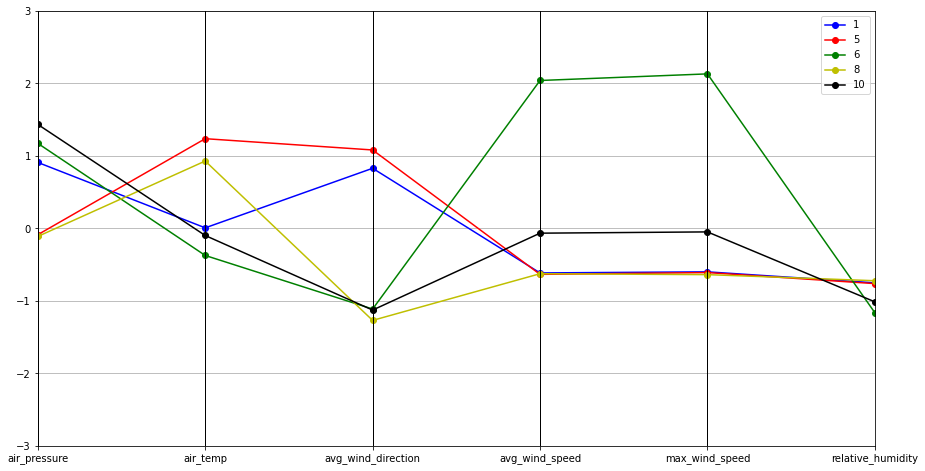

In [166]:
# x -axis is denotes each feature
# y axis center points
# lines indicates cluster 
parallel_plot(P[P['relative_humidity']<-0.5])

# Warm days

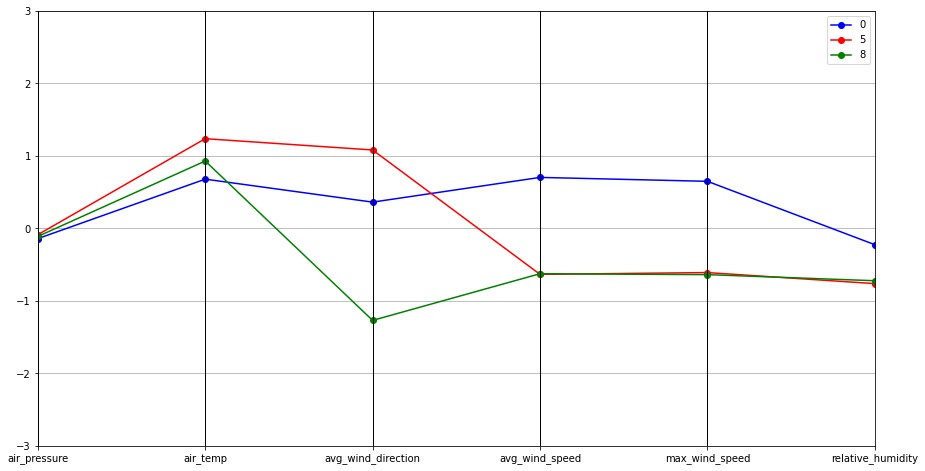

In [167]:
parallel_plot(P[P['air_temp']>0.5])

# Cool Days

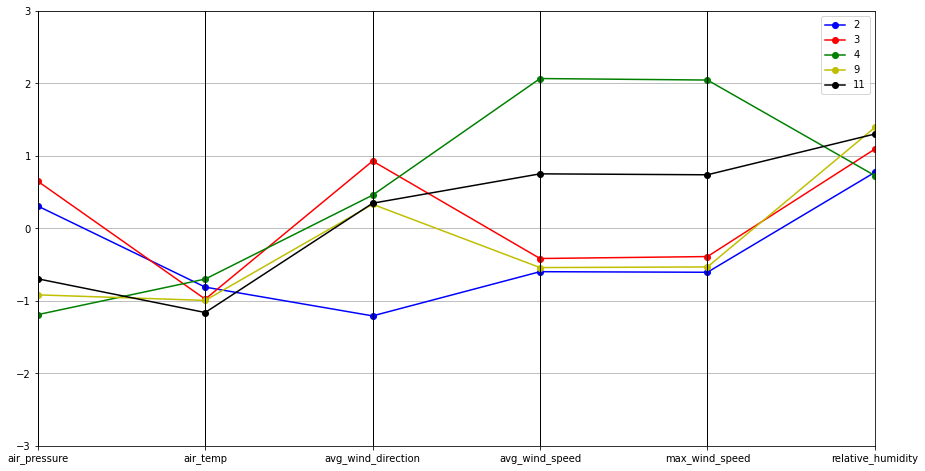

In [169]:
parallel_plot(P[ (P['relative_humidity']>0.5) & (P['air_temp'] <0.5)])

# Conclusion
## These are the clusters that has behaviour Dry days, warm days, and cool days
## Parallel feature plot helps for analysing clusters which we have high dimensionality of features to gain the intution of each cluster differ for each feature


### To me, for example, cluster four seems to correspond to hot
### and dry days with fairly stagnant air.
### So just look at them and try to imagine the air on that day, and how you could further now